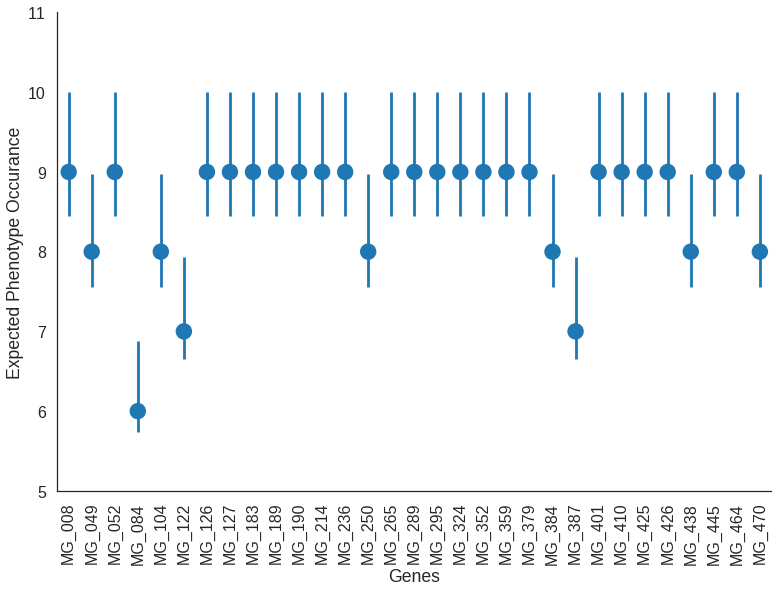

In [3]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# from https://stackoverflow.com/questions/43159528/error-bars-with-seaborn-and-stripplot?rq=1
# https://matplotlib.org/gallery/statistics/errorbar_features.html

koci = pd.read_csv('results31_singlegeneko_binom_confit.csv')
fig, ax = plt.subplots()
plot = sns.pointplot(x='genes', y='x', data=koci, join=False) # x = success column from csv

# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax.collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# error bar values w/ different -/+ errors that
# also vary with the x-position
lower_error = koci['lower'].tolist()
#print lower_error
upper_error = koci['upper'].tolist()
#print upper_error
asymmetric_error = [lower_error, upper_error]
#print asymmetric_error
ax.errorbar(x_coords, y_coords, yerr=asymmetric_error, fmt=' ', zorder=-1)

#Settings
ax.set_ylabel("Expected Phenotype Occurance")
ax.set_xlabel('Genes')
plt.xticks(rotation=90)
plt.ylim(5, 11)
#plt.setp(fig.axes, yticks=[]) #remove axis ticks
#change_width(ax, .3) #change width of bars
sns.despine() #remove right and top lines of chart
#sns.despine(left=True) # remove right, top, and left lines of chart
#plt.style.use(['seaborn-white', 'seaborn-talk']) #set styles and relative object sizes
#plt.style.use(['seaborn-white', 'seaborn-paper'])
plt.style.use(['seaborn-white', 'seaborn-poster'])

#Export figure
figure = plot.get_figure()    
figure.savefig('singlekoCIplot.png', dpi=400)
figure.savefig('singlekoCIplot.svg', dpi=400)